In [363]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [55]:
data = pd.DataFrame(pd.read_csv('resources/travel_survey.csv'))
data.head()

,Timestamp,age,gender,home_country,current_country,education,employment,work_in_travel_industry,relationship_status,passport,...,strangest_souvenir,best_souvenir,best_non-essential_item_to_bring,If you could travel to a fictional place which would you choose?,When is your next trip?,next_trip_country,"In 10 words or less, what is your best travel tip?",primary_deciding_factor_for_travel,What would be the most important thing you would like to see change for /r/travel ?,"To exclude submissions by bots, please select ""a cruise"" from the options below."
0,19/05/2018 10:32:55,22-29,Male,United States,Germany,Master,Full-time,I do NOT work in the travel industry,Dating,Yes - valid,...,NaN,NaN,earplugs,Tar Valon,0-1 months,Czech Republic,have multiple ways to pay,Cheap transportation,The ban of poptarts,A cruise
1,21/05/2018 09:30:37,22-29,Male,Russian Federation,Russian Federation,Bachelor,Full-time,I do NOT work in the travel industry,Dating,Yes - valid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21/05/2018 09:32:02,30-40,Male,Germany,Germany,Master,Full-time,I do NOT work in the travel industry,Single,Yes - valid,...,NaN,NaN,camera,NaN,0-1 months,United Kingdom,stay flexible,Destination,fewer photos,A cruise
3,21/05/2018 09:33:49,22-29,Male,United States,United States,Bachelor,Full-time,I do NOT work in the travel industry,Single,Yes - valid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21/05/2018 09:45:10,19-21,Female,Malaysia,Malaysia,Bachelor,Unemployed,I do NOT work in the travel industry,Single,Yes - expired,...,Autumn leaves,Coins,Earphones,Elysium,0-1 months,Germany,Watch your belongings.,Destination,nothing,A cruise


In [58]:
list(data.columns)

['Timestamp',
 'age',
 'gender',
 'home_country',
 'current_country',
 'education',
 'employment',
 'work_in_travel_industry',
 'relationship_status',
 'passport',
 'avg_trips_per_year',
 'days_per_year_travelling',
 'business_travel_days',
 'travel_days_outside_home_country',
 'currency',
 'r/travel_frequency',
 'plane_travel',
 'bus_travel',
 'train_travel',
 'boat_travel',
 'bike_travel',
 'car_travel',
 'motorcycle_travel',
 'walk_travel',
 'other_travel_mode',
 'money_spent_on_travel',
 'percent_eating_out',
 'nights_in_one_place',
 'num_countries_traveled_to',
 'favorite_country',
 'What motivates you to travel?',
 'To avoid bot responses from being included, please select "Rome" from the drop-down list',
 'percentage_of_solo_travel',
 'motivation_for_visiting_r/travel',
 'lost_a_bag',
 'where_lost_bag',
 'travel_insurance',
 'travel_blog',
 'travel_blog_purpose',
 'Would you like to take the extended/additional questions? (~5 minutes)',
 'second_passport',
 'second_passport_coun

In [106]:
age_range = pd.DataFrame(data.groupby('age')['age'].count())
age_range

,age
age,
0-16,17
17-18,38
19-21,94
22-29,390
30-40,208
41-50,30
51-64,29
65+,5


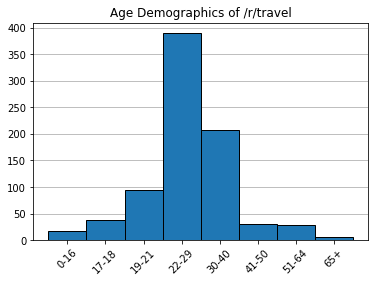

In [104]:
fig, ax = plt.subplots(1,1)
ax.grid(zorder=0,axis='y')
plt.bar(age_range.index,age_range['age'], edgecolor = 'black',zorder=3, width=1)
plt.xticks(rotation=45)
plt.title('Age Demographics of /r/travel')
plt.show()

In [93]:
# Worst Destination people have been to 
worst_country = pd.DataFrame(data['worst_destination'].value_counts())
worst_country.head()

,worst_destination
United States,45
France,40
Italy,28
Belgium,22
United Kingdom,19


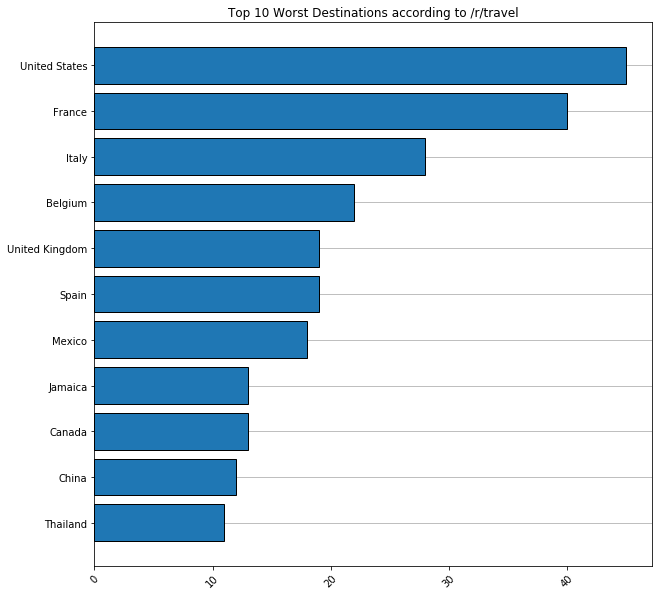

In [141]:
plt.figure(figsize=(10,10))
plt.barh(worst_country.index[10::-1], worst_country['worst_destination'][10::-1], edgecolor = 'black',zorder=3)
plt.xticks(rotation=45)
plt.title('Top 10 Worst Destinations according to /r/travel')
plt.grid(axis='y')

plt.show()

In [171]:
worst_by_nationality = pd.DataFrame(data.groupby('home_country')['worst_destination'].value_counts())

In [184]:
US_data = data.loc[(data['home_country'] =='United States')]
US_data['unexpected_positive_country'].value_counts()

Mexico                  17
France                  14
Canada                  10
United States            9
Italy                    9
United Kingdom           9
Belgium                  8
Czech Republic           7
Germany                  6
Croatia                  6
Bosnia Herzegovina       6
China                    6
Hungary                  6
Portugal                 6
Turkey                   5
Poland                   5
Iceland                  5
Costa Rica               5
Switzerland              5
Taiwan                   5
Spain                    5
Greece                   5
Slovenia                 4
Indonesia                4
Bahamas                  4
Colombia                 4
Thailand                 4
Vietnam                  4
Cambodia                 4
Guatemala                4
                        ..
Nepal                    1
Qatar                    1
Egypt                    1
Tanzania                 1
United Arab Emirates     1
Morocco                  1
M

In [186]:
US_data['worst_destination'].value_counts()

United States         29
Mexico                18
France                17
Italy                 16
Belgium               14
Canada                12
United Kingdom        11
Jamaica                9
China                  7
Bahamas                6
Spain                  6
Netherlands            6
Germany                5
Austria                5
Ireland {Republic}     4
Costa Rica             4
Slovakia               4
Belize                 3
Morocco                3
Dominican Republic     3
Czech Republic         3
Chile                  3
Philippines            3
Taiwan                 3
Thailand               3
Japan                  3
Peru                   3
Vatican City           2
Qatar                  2
Denmark                2
                      ..
Turkey                 1
Pakistan               1
Tanzania               1
Nepal                  1
Portugal               1
Cambodia               1
Jordan                 1
Zimbabwe               1
Hungary                1


In [188]:
# data['favorite_country'].value_counts()

Japan                   74
Italy                   72
France                  48
Spain                   39
United States           30
United Kingdom          25
Thailand                25
Vietnam                 21
Ireland {Republic}      20
Germany                 18
Netherlands             18
Switzerland             17
Croatia                 16
Greece                  16
Turkey                  15
Mexico                  15
Iceland                 15
New Zealand             15
Australia               14
South Africa            12
Colombia                12
Canada                  12
Indonesia               12
Taiwan                  11
China                   11
Czech Republic          10
Cambodia                 9
India                    8
Portugal                 7
Norway                   7
                        ..
Bulgaria                 2
Uganda                   2
Israel                   2
Myanmar, {Burma}         2
Chile                    2
Russian Federation       2
G

In [256]:
# data.groupby('home_country')['favorite_country'].value_counts()

In [265]:
# Getting data for ages 22-29 in US 
def US_by_age(column,age_range):
    US_millenials = pd.DataFrame(US_data.loc[US_data['age'] == age_range]\
                                 .groupby('age')[column]\
                                 .value_counts())
    return US_millenials

US_by_age('favorite_country', '22-29').head()

favorite_country
age   favorite_country                    
22-29 Japan                             17
      Italy                             15
      Spain                             11
      Thailand                          10
      Ireland {Republic}                 9

In [267]:
US_by_age('favorite_airport_food','22-29').head(10)

favorite_airport_food
age   favorite_airport_food                       
22-29 Beer                                       7
      Pizza                                      6
      Coffee                                     5
      Burger                                     4
      Burgers                                    4
      None                                       4
      Mexican                                    3
      Burritos                                   2
      Cheap                                      2
      McDonalds                                  2

In [269]:
# data.groupby(['age','education'])['worst_destination'].value_counts()
US_by_age('favorite_airport_food','30-40').head(10)

favorite_airport_food
age   favorite_airport_food                             
30-40 Beer                                             3
      Fries                                            3
      Pizza                                            3
      Burgers                                          2
      Free lounge food                                 2
      Mexican                                          2
      sandwich                                         2
      &pizza                                           1
      ATL                                              1
      Any semblance of local food                      1

In [274]:
US_by_age('money_spent_on_travel', '30-40')

money_spent_on_travel
age   money_spent_on_travel                       
30-40 5000.0                                    22
      10000.0                                   19
      15000.0                                   12
      6000.0                                    11
      3000.0                                     8
      1000.0                                     4
      2000.0                                     4
      8000.0                                     4
      2500.0                                     3
      7500.0                                     2
      14000.0                                    2
      20000.0                                    2
      30000.0                                    2
      33000.0                                    2
      40000.0                                    2
      50000.0                                    2
      3500.0                                     1
      4500.0                                     1
      16000.0                                    1
      24000.0                                    1
      25000.0                                    1
      36000.0                                    1
      38000.0                                    1
      70000.0                                    1
      75000.0                                    1

In [273]:
US_by_age('money_spent_on_travel', '22-29')

money_spent_on_travel
age   money_spent_on_travel                       
22-29 5000.0                                    38
      3000.0                                    22
      2000.0                                    17
      4000.0                                    16
      1000.0                                    11
      6000.0                                    11
      7000.0                                    10
      10000.0                                    9
      1500.0                                     8
      2500.0                                     7
      15000.0                                    5
      500.0                                      3
      20000.0                                    3
      200.0                                      2
      800.0                                      2
      1200.0                                     2
      8000.0                                     2
      9000.0                                     2
      100.0                                      1
      350.0                                      1
      700.0                                      1
      900.0                                      1
      12000.0                                    1
      30000.0                                    1

In [251]:
# number of people in each age group for US
US_data.groupby('age')['Timestamp'].count()

age
0-16       7
17-18     12
19-21     33
22-29    189
30-40    119
41-50     18
51-64     20
65+        4
Name: Timestamp, dtype: int64

In [281]:
def all_by_age(column, age_range):
    df = pd.DataFrame(data.loc[data['age']== age_range]\
                             .groupby('age')[column]\
                             .value_counts())
    return df

all_22_29 = all_by_age('money_spent_on_travel','22-29')
all_30_40 = all_by_age('money_spent_on_travel', '30-40')

In [341]:
#select age columns where age == 22-29 or 30-40. select the most relvant age groups
twenty_two = data[(data['age'] == '22-29')]
twenty_two_sorted = pd.DataFrame(twenty_two.sort_values(by="money_spent_on_travel", ascending=True)['money_spent_on_travel']\
                                .dropna(how="any")\
                                .value_counts()\
                                .sort_index())

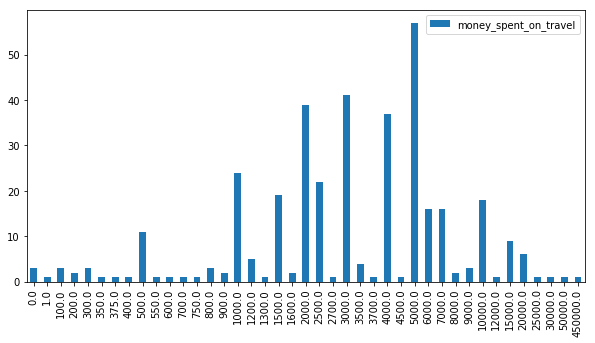

In [371]:
twenty_two_sorted.plot(kind="bar",figsize=(10,5),label="avg money spent on travel")
plt.show()

In [373]:
twenty_two['money_spent_on_travel'].describe()

count       364.000000
mean       5617.928571
std       23821.885551
min           0.000000
25%        2000.000000
50%        3000.000000
75%        5000.000000
max      450000.000000
Name: money_spent_on_travel, dtype: float64

In [377]:
twenty_two[(twenty_two['gender']=="Female")].describe()

,avg_trips_per_year,days_per_year_travelling,business_travel_days,travel_days_outside_home_country,money_spent_on_travel,nights_in_one_place,num_countries_traveled_to,num_countries_lived_in,days_PTO,num_years_at_job,days_taken_off_after_business_travel
count,147.000000,147.000000,146.000000,144.000000,136.000000,144.000000,148.000000,121.000000,107.000000,110.000000,65.000000
mean,4.401361,29.102041,5.890411,19.284722,4599.632353,5.048611,11.831081,1.685950,21.859813,2.436364,0.430769
std,4.558088,36.604277,30.051708,37.903570,5589.475879,8.903782,8.145270,0.991909,36.807108,1.932471,0.983762
min,0.000000,2.000000,0.000000,0.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,14.000000,0.000000,7.000000,2000.000000,3.000000,6.000000,1.000000,11.000000,1.000000,0.000000
50%,3.000000,20.000000,0.000000,14.000000,3000.000000,3.000000,10.000000,1.000000,20.000000,2.000000,0.000000
75%,5.000000,30.000000,2.000000,20.000000,5000.000000,5.000000,16.000000,2.000000,23.500000,3.000000,0.000000
max,25.000000,365.000000,300.000000,360.000000,50000.000000,100.000000,40.000000,6.000000,365.000000,8.000000,5.000000


In [381]:
twenty_two[(twenty_two['gender']=="Female")]['worst_destination'].value_counts()

France                16
Spain                  5
United Kingdom         5
United States          4
Italy                  3
Mexico                 3
Austria                3
Jamaica                2
Indonesia              2
Portugal               2
Czech Republic         2
Belize                 2
Dominican Republic     2
China                  2
Belgium                2
Ireland {Republic}     2
Slovakia               2
Turkey                 2
Morocco                2
Malta                  2
Greece                 2
Barbados               1
Costa Rica             1
Netherlands            1
Brazil                 1
Canada                 1
Chile                  1
Germany                1
Iceland                1
Vanuatu                1
India                  1
Thailand               1
Malaysia               1
Monaco                 1
Denmark                1
Singapore              1
Bosnia Herzegovina     1
Kuwait                 1
Name: worst_destination, dtype: int64

In [378]:
twenty_two[(twenty_two['gender']=="Male")].describe()

,avg_trips_per_year,days_per_year_travelling,business_travel_days,travel_days_outside_home_country,money_spent_on_travel,nights_in_one_place,num_countries_traveled_to,num_countries_lived_in,days_PTO,num_years_at_job,days_taken_off_after_business_travel
count,240.000000,239.000000,240.000000,237.000000,228.000000,234.000000,237.000000,175.000000,154.000000,157.000000,106.000000
mean,4.491667,30.523013,5.066667,20.109705,6225.333333,4.495726,15.278481,1.794286,21.967532,2.382166,0.528302
std,4.210956,29.639687,15.196197,24.373258,29797.644032,8.963683,11.808432,1.219087,32.848119,2.134980,1.180860
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,14.000000,0.000000,7.000000,2000.000000,3.000000,6.000000,1.000000,10.000000,1.000000,0.000000
50%,3.000000,21.000000,0.000000,15.000000,3000.000000,3.000000,12.000000,1.000000,20.000000,2.000000,0.000000
75%,5.000000,30.000000,3.000000,25.000000,5000.000000,4.000000,21.000000,2.000000,25.000000,3.000000,0.000000
max,30.000000,230.000000,130.000000,230.000000,450000.000000,130.000000,70.000000,10.000000,365.000000,10.000000,6.000000


In [384]:
#grab info for all males in US ages 22-29 for worst destination
twenty_two[(twenty_two['gender']=="Male") & (twenty_two['home_country']=="United States")]['worst_destination'].value_counts()

United States           9
Italy                   5
Mexico                  5
Bahamas                 4
Belgium                 4
Netherlands             3
France                  3
United Kingdom          2
Peru                    2
Jamaica                 2
Canada                  2
Spain                   1
China                   1
Vatican City            1
Philippines             1
Greece                  1
Zimbabwe                1
Israel                  1
Jordan                  1
Cambodia                1
Nepal                   1
Denmark                 1
Japan                   1
Qatar                   1
Slovakia                1
Kuwait                  1
Germany                 1
Iceland                 1
Argentina               1
Belize                  1
Chile                   1
Turkey                  1
Serbia                  1
Laos                    1
Vietnam                 1
United Arab Emirates    1
Name: worst_destination, dtype: int64

In [440]:
# data cleanup for worst destinations by gender
worst_countries_by_gender = data.groupby('gender')['worst_destination'].value_counts().unstack().transpose()
worst_countries_by_gender['sum'] = worst_countries_by_gender.sum(axis=1)
p = worst_countries_by_gender.sort_values(by='sum', ascending=False)
p = p.drop(columns=['sum'])
p.head()

gender,Female,Male
worst_destination,,
United States,13.0,32.0
France,23.0,17.0
Italy,10.0,18.0
Belgium,10.0,12.0
Spain,7.0,12.0


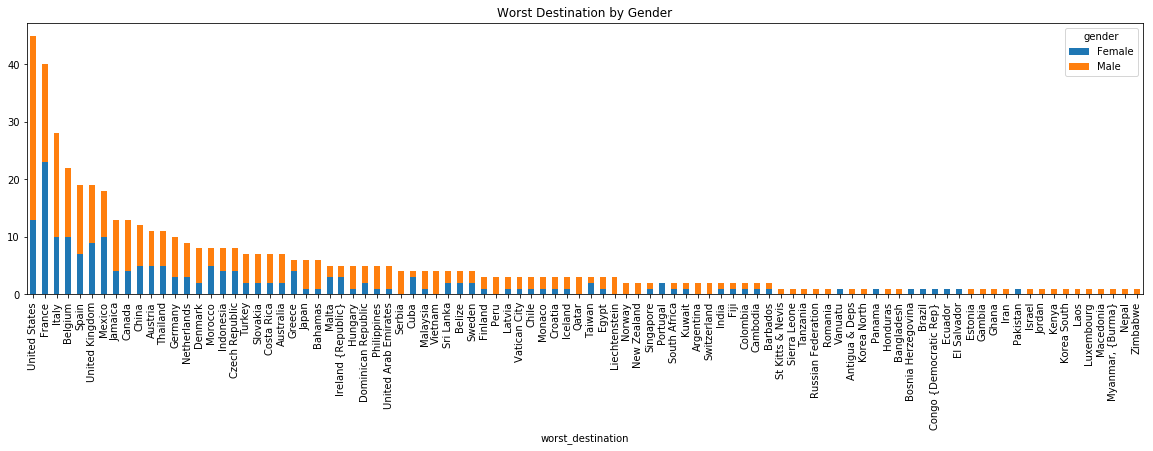

In [443]:
title= "Worst Destination by Gender"
p.plot(kind='bar', stacked=True,figsize=(20,5), title=title)
plt.show()